# import data

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes= True)
%matplotlib inline

df=pd.read_csv('https://drive.google.com/uc?export=download&id=1CyqcB1QNbNFMcuhH3mjbzliBxj47YLYb')
#I uploaded the data set to my googlt drive and created a download link for the file.
data1=list(df[' gdp_for_year ($) '])
for i in range(0, df.shape[0]):
  data1[i]=pd.to_numeric(str(df.iloc[i][' gdp_for_year ($) ']).replace(',',''))
df[' gdp_for_year ($) ']=pd.Series(data1)
#print('updated data type of variables are:')
#print(df.dtypes)

display(df)

country  year  ... gdp_per_capita ($)       generation
0         Albania  1987  ...                796     Generation X
1         Albania  1987  ...                796           Silent
2         Albania  1987  ...                796     Generation X
3         Albania  1987  ...                796  G.I. Generation
4         Albania  1987  ...                796          Boomers
...           ...   ...  ...                ...              ...
27815  Uzbekistan  2014  ...               2309     Generation X
27816  Uzbekistan  2014  ...               2309           Silent
27817  Uzbekistan  2014  ...               2309     Generation Z
27818  Uzbekistan  2014  ...               2309     Generation Z
27819  Uzbekistan  2014  ...               2309          Boomers

[27820 rows x 12 columns]

# 1a

In [105]:
country6= ['United Kingdom','United States','Brazil', 'Mexico', 'Japan', 'Spain']
for con in country6:
  print('for '+ con)
  print(df[df['country']==con].groupby('year').count())
  print(df.groupby(['country', 'year'])['population'].sum()[con])
  print('\n')
#verfied that all 6 countries have same year range and that population is over 10 million for each year

for United Kingdom
      country  sex  age  ...   gdp_for_year ($)   gdp_per_capita ($)  generation
year                     ...                                                    
1985       12   12   12  ...                  12                  12          12
1986       12   12   12  ...                  12                  12          12
1987       12   12   12  ...                  12                  12          12
1988       12   12   12  ...                  12                  12          12
1989       12   12   12  ...                  12                  12          12
1990       12   12   12  ...                  12                  12          12
1991       12   12   12  ...                  12                  12          12
1992       12   12   12  ...                  12                  12          12
1993       12   12   12  ...                  12                  12          12
1994       12   12   12  ...                  12                  12          12
1995     

In [106]:
df1=df.groupby(['country', 'year'])['suicides_no'].sum()
df2=df.groupby(['country', 'year'])['population'].sum()
for con in country6:
  sui=np.array(df1[con].values)
  pop=np.array(df2[con].values)
  #since suicide/100k of total population is not summation of suicide/100k pop
  rate=sui*100*1000/pop
  print('For '+con)
  print(f'Mean= {rate.mean()}')
  #print(f'Mean= {rate.sum()/len(rate)}')
  print(f'Variance= {rate.var(ddof=1)}')
  print()

For United Kingdom
Mean= 7.8840826914301525
Variance= 0.4713653853878043

For United States
Mean= 12.835303001368596
Variance= 0.8239933076863555

For Brazil
Mean= 4.570885198723902
Variance= 0.4906997714491626

For Mexico
Mean= 3.858872958958654
Variance= 0.9025298500567932

For Japan
Mean= 21.88620318700118
Variance= 10.697810293442641

For Spain
Mean= 8.16411468946822
Variance= 0.28378335047742637



# 1b

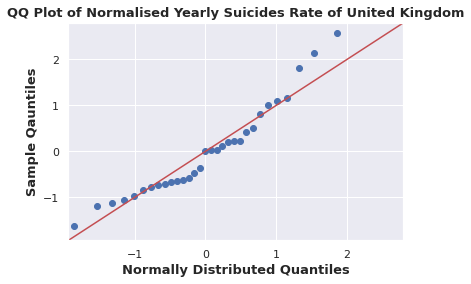

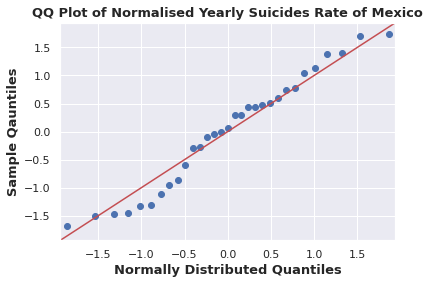

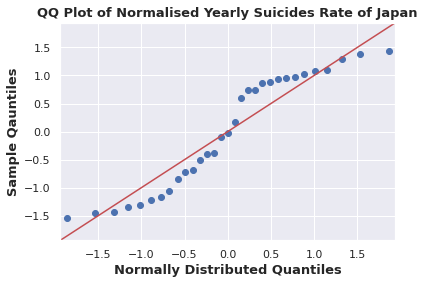

In [107]:
import statsmodels.api as sm
for con in country6:
  sui=np.array(df1[con].values)
  pop=np.array(df2[con].values)
  #since suicide/100k of total population is not summation of suicide/100k pop
  rate=sui*100*1000/pop
  fig = sm.qqplot(rate, fit=True, line="45")
  plt.ylabel("Sample Qauntiles", size=13,fontweight='bold')
  plt.xlabel("Normally Distributed Quantiles",size=13, fontweight='bold')
  plt.title("QQ Plot of Normalised Yearly Suicides Rate of %s"%con, size=13,fontweight='bold')
  plt.show()
  print('\n')

# 1c

$p(x)= \frac{1}{\sqrt{2\pi}\sigma}exp(\frac{-(x-\mu)^2}{\sigma^2})$

$Log \ Likelihood= \frac{-1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2 -\frac{n}{2}\log{2\pi\sigma^2} \$

In [108]:
for con in country6:
  sui=np.array(df1[con].values)
  pop=np.array(df2[con].values)
  #since suicide/100k of total population is not summation of suicide/100k pop
  rate=sui*100*1000/pop
  #mew=rate.mean()
  mew=rate.sum()/len(rate)
  #print(f'mew = {mew}')
  #sigma=rate.std(ddof=0)
  sigma=np.sqrt(((rate-mew)**2).sum()/len(rate))
  #print(f'sigma= {sigma}')
  Px=np.exp(-(rate-mew)**2/(2*sigma**2))/np.sqrt((2*np.pi*sigma**2))
  #print(Px)
  llh=np.log(Px).sum()
  print('For '+con)
  print(f'Log Likelihood= {llh}\n')

For United Kingdom
Log Likelihood= -31.82096560688677

For United States
Log Likelihood= -40.47816277748315

For Brazil
Log Likelihood= -32.444048849993514

For Mexico
Log Likelihood= -41.8892728013517

For Japan
Log Likelihood= -80.21445793890175

For Spain
Log Likelihood= -23.95591744883829



* The country (Spain) with largest log liklihood has the most gaussian like distribution. We can see this in the QQ plot of Spain which is almost along the 45 degree straight line indicating a good correlation with the line and hence a higher possibility of their Distribution being Gaussian.
* The country (Japan) has the smallest log liklihood and we can see that it's QQ plot also deviates a lot from the 45 degree straight line indicating a poor correlation with the line and hence a lower possibility of their Distribution being Gaussian.

# 1d

$\mu= Population \ mean$

$\bar{x}= Sample \ mean$

$P[|\mu - \bar{x}| \leq \epsilon] \leq \alpha$

$ If \ \alpha=0.05\, we \ say \ with \ 95\% \ confidence \ that \ \mu \ lies \ in \ (\bar{x}-\epsilon, \bar{x}+\epsilon)$

$P[ \bar{x}-\epsilon \leq \mu \leq \bar{x}+\epsilon] \leq \alpha  \implies \epsilon=\frac{ z_{\alpha/2}\sigma}{\sqrt{n}}$

$ For \ X \ \sim N(0,1) \ z_{\alpha/2} is \ s.t \ P[X\leq z_{\alpha/2}]= 1-\frac{\alpha}{2} $

In [109]:
import scipy.stats as st
print("95% CI for Mean of Yearly Suicide Rate:\n")

for con in country6:
    alpha= 0.05
    sui=np.array(df1[con].values)
    pop=np.array(df2[con].values)
    #since suicide/100k of total population is not summation of suicide/100k pop
    rate=sui*100*1000/pop
    std= rate.std(ddof=1) #Sample Unbiased Standard Deviation 
    
    n=len(rate) #Number of Samples
    z= st.norm.ppf(1-alpha/2)
    epsilon= z*std/np.sqrt(n)
    lowlim= rate.mean() -epsilon
    uplim= rate.mean() +epsilon
    
    print(con+ f' : {lowlim, uplim} \n')

95% CI for Mean of Yearly Suicide Rate:

United Kingdom : (7.642399700085261, 8.125765682775045) 

United States : (12.515760164621659, 13.154845838115532) 

Brazil : (4.324295362621062, 4.817475034826741) 

Mexico : (3.5244485013409186, 4.19329741657639) 

Japan : (20.734833767936777, 23.03757260606558) 

Spain : (7.97658903059098, 8.351640348345462) 



In [110]:
#using function instead of manual calculation
print("95% CI for Mean of Yearly Suicide Rate:\n")
for con in country6:
  sui=np.array(df1[con].values)
  pop=np.array(df2[con].values)
  #since suicide/100k of total population is not summation of suicide/100k pop
  rate=sui*100*1000/pop
  print('For'+con)
  print(st.norm.interval(0.95, loc=np.mean(rate), scale=st.sem(rate)))
  print()

95% CI for Mean of Yearly Suicide Rate:

ForUnited Kingdom
(7.642399700085261, 8.125765682775045)

ForUnited States
(12.515760164621659, 13.154845838115532)

ForBrazil
(4.324295362621063, 4.8174750348267406)

ForMexico
(3.5244485013409186, 4.19329741657639)

ForJapan
(20.734833767936777, 23.03757260606558)

ForSpain
(7.97658903059098, 8.351640348345462)



# 1e

Closest mean suicide rates are for United Kingdom(1) and Spain(2)\
Doing Welch Test and Wilcoxon signed rank test with with 95% confidence\
Null Hypothesis ( H0 ): Both Mean suicide rates are the same\
Alternate Hypothesis ( H1 ): Both mean suicide rates are actually different

i) Welch t-test

In [111]:
rate1=np.array(df1['United Kingdom'].values)*100*1000/np.array(df2['United Kingdom'].values)
x1= rate1.mean()
s1=rate1.std(ddof=1)
n1=len(rate1)

rate2=np.array(df1['Spain'].values)*100*1000/np.array(df2['Spain'].values)
x2=rate2.mean()
s2=rate2.std(ddof=1)
n2=len(rate2)
#print(x1,s1,n1,x2,s2,n2)

t=(x1-x2)/np.sqrt(s1**2/n1 + s2**2/n2)
print(f'Welch t test= {t}')

Welch t test= -1.794205799687952


In [112]:
alpha=0.05 #for 95% confidence
t, pval= st.ttest_ind(rate1, rate2, equal_var= False)

print("t-value = %f"%t)
print("Significance Level = %d%%"%(alpha*100))
print("P-value = %f"%pval)
if alpha >= pval:
    print("Null Hypothesis rejected. So, the mean suicide rates of Spain and UK truly differ from each other")
else:
    print("Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same")

t-value = -1.794206
Significance Level = 5%
P-value = 0.078130
Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same


ii) Wilcoxon's Signed Rank Test

In [113]:
_, pval = st.wilcoxon(x=rate1, y=rate2)
print("Significance Level = %d %%"%(alpha*100))
print("P-value = %f"%pval)
if alpha >= pval:

    print("Null Hypothesis rejected. So, the mean suicide rates of Spain and UK truly differ from each other")
else:
    print("Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same")

Significance Level = 5 %
P-value = 0.065464
Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same


# 1f

Confidence Level is **95%**\
Null Hypothesis ($H_0$): $\overline{d}$ actually equals 0\
Alternate Hypothesis ($H_1$): $\overline{d}$ $\neq$ 0

In [114]:
d= rate1-rate2 #Pairing Parameter, paired by their difference
d_bar= d.mean() #Sample Mean

#Can we say with 95% Confidence that d_bar != 0 ?
t, pval= st.ttest_1samp(d, 0)

print("t-value = %f"%t)
print("Significance Level = %d%%"%(alpha*100,))
print("P-value = %f"%pval)
if alpha >= pval:
    print("Null Hypothesis rejected. So, the mean suicide rates of Spain and UK truly differ from each other")
else:
    print("Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same")

t-value = -1.579108
Significance Level = 5%
P-value = 0.124799
Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same


# 1g

In [115]:
tot_sui= df.groupby(['country','year'])['suicides_no'].sum()
tot_pop= df.groupby(['country','year'])['population'].sum()
rate_all= tot_sui*100000/tot_pop
a= rate_all.reset_index().rename(columns={0:'suicide rate/100k total pop'})
b=df.groupby(['country','year'])['HDI for year'].mean().reset_index()
c=df.groupby(['country','year'])['gdp_per_capita ($)'].mean().reset_index()
a['HDI'], a['gdp_per_capita ($)']=b['HDI for year'], c['gdp_per_capita ($)']

#Dataframe containing country and yearwise suicide rate, HDI,GDP per capita
display(a)


country  year  suicide rate/100k total pop    HDI  gdp_per_capita ($)
0        Albania  1987                     2.694125    NaN                 796
1        Albania  1988                     2.279058    NaN                 769
2        Albania  1989                     2.425886    NaN                 833
3        Albania  1992                     1.665190    NaN                 251
4        Albania  1993                     2.600363    NaN                 437
...          ...   ...                          ...    ...                 ...
2316  Uzbekistan  2010                     5.707206  0.655                1533
2317  Uzbekistan  2011                     6.313022  0.661                1767
2318  Uzbekistan  2012                     6.955545  0.668                1964
2319  Uzbekistan  2013                     7.265567  0.672                2150
2320  Uzbekistan  2014                     7.670198  0.675                2309

[2321 rows x 5 columns]

In [116]:
r_hdi, p_hdi= st.pearsonr(a.dropna()['suicide rate/100k total pop'],a.dropna()['HDI'])
r_gdp, p_gdp= st.pearsonr(a['suicide rate/100k total pop'],a['gdp_per_capita ($)'])


print("Correlation Coefficient between Suicide Rate (per 100k pop) and HDI is : %.4f"%r_hdi)
print("Its Significance Level is: %s \n"%p_hdi)

print("Correlation Coefficient between Suicide Rate (per 100k pop) and GDP per \
capita is : %.4f"%r_gdp)
print("Its Significance Level is: %f"%p_gdp)

Correlation Coefficient between Suicide Rate (per 100k pop) and HDI is : 0.2167
Its Significance Level is: 7.537396881903724e-09 

Correlation Coefficient between Suicide Rate (per 100k pop) and GDP per capita is : 0.0604
Its Significance Level is: 0.003622


In [117]:
plt.subplots(figsize=(17,9))
plt.plot(a['HDI'],a['suicide rate/100k total pop'], 'o',mec='black', mew=1.5, color='yellow',ms=8)
sns.regplot(a['HDI'],a['suicide rate/100k total pop'], color='red')

plt.xlabel('HDI', fontweight='bold', size=15)
plt.ylabel('Suicide Rate (per 100K total pop)', fontweight='bold', size=15)
plt.title("Regression Plot of Suicide Rate (per 100k total pop) vs HDI", fontweight='bold',size=17)
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


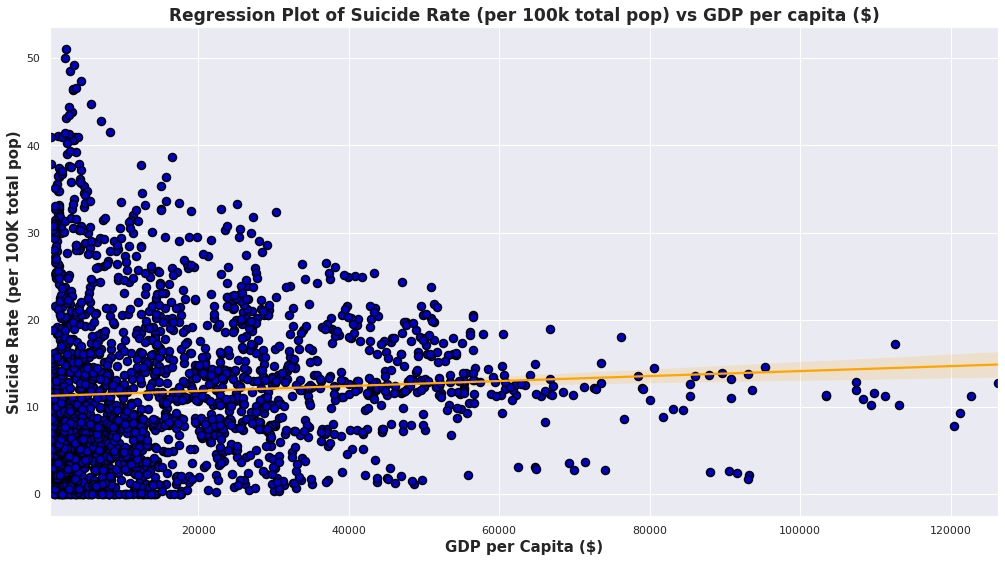

In [118]:
plt.subplots(figsize=(17,9))
plt.plot(a['gdp_per_capita ($)'],a['suicide rate/100k total pop'], 'o',mec='black', mew=1.5, color='mediumblue',ms=8)
sns.regplot(a['gdp_per_capita ($)'],a['suicide rate/100k total pop'], color='orange')

plt.xlabel('GDP per Capita ($)', fontweight='bold', size=15)
plt.ylabel('Suicide Rate (per 100K total pop)', fontweight='bold', size=15)
plt.title("Regression Plot of Suicide Rate (per 100k total pop) vs GDP per capita ($)", fontweight='bold',size=17)
plt.show();